# Grundläggande analys och statistik

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.dpi"] = 120
np.set_printoptions(precision=3)
pd.set_option("display.precision", 3)
plt.style.use("ggplot")

In [46]:
# Läsning av datasetet
df = pd.read_csv("../data/health_study_dataset.csv")

# Snabb kontroll
print(df.sample(5))
print()
print(df.info())
print()
print(df.describe())

      id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
666  667   46   F   158.7    62.8        139.0         4.95     No        0
679  680   69   F   172.0    71.7        160.0         5.28     No        0
437  438   29   F   169.0    72.7        148.6         6.14     No        0
203  204   65   M   184.9    74.9        144.0         5.08     No        0
99   100   46   F   158.8    80.1        139.4         4.98    Yes        0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      8

In [47]:
# Städning
df.isna().sum()
df.duplicated().sum()

np.int64(0)

## Inledande observation

- Datasetet innehåller 800 rader, 9 kolumner. Inga saknade värden eller dubbletter

- Datatyper: 
    - Numeriska kontinuerliga: height, weight, systolic_bp, cholesterol
    - Numeriska diskreta: id, age, disease
    - Kategoriska: sex, smoker

- Range och fördelning:
    - Ålder varierar mellan 18 och 90 år, med ett medelvärde på cirka 49 år
    - Längd och vikt ligger inom rimliga intervall för vuxna
    - Blodtryck och kolesterol har också sannolika värden

## Beskrivande analys

In [48]:
# Beräkning av medelvärde, median, min och max för age, weight, height, systolic_bp och cholesterol.
desc_stat = df[["age","weight","height","systolic_bp","cholesterol"]].agg(["mean", "median", "min", "max"])
print(desc_stat)

           age   weight   height  systolic_bp  cholesterol
mean    49.426   73.413  171.849      149.179        4.929
median  50.000   73.200  171.350      149.400        4.970
min     18.000   33.700  144.400      106.800        2.500
max     90.000  114.400  200.400      185.900        7.880


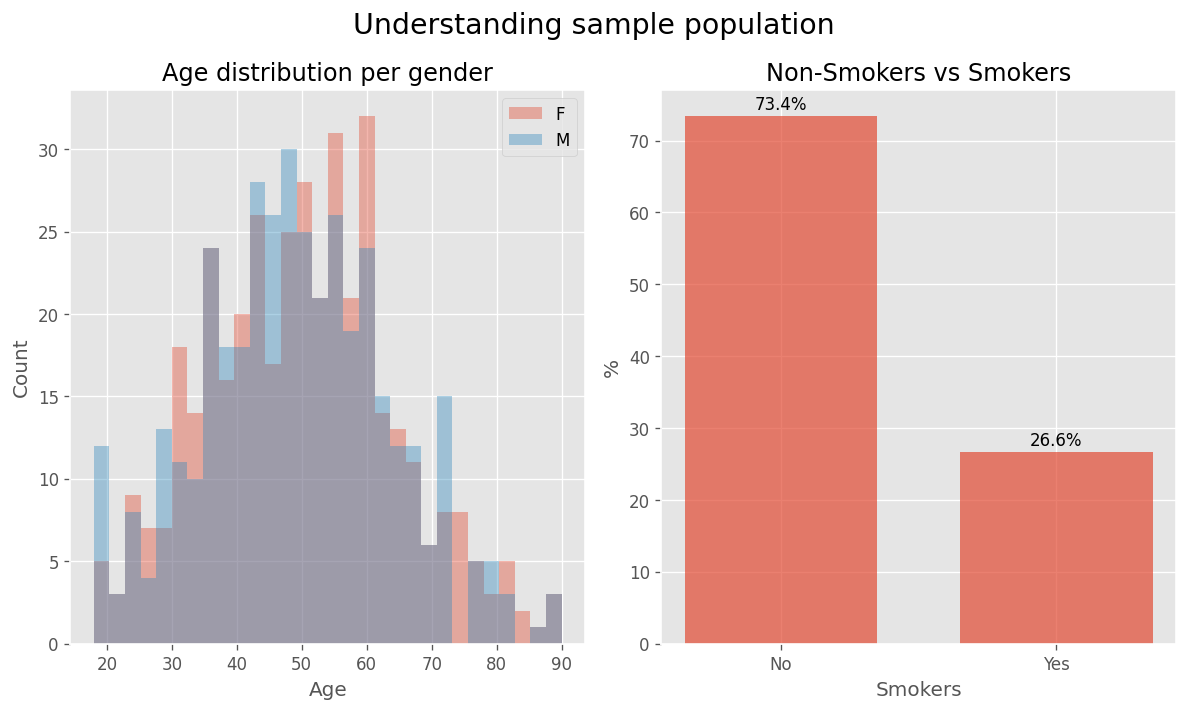

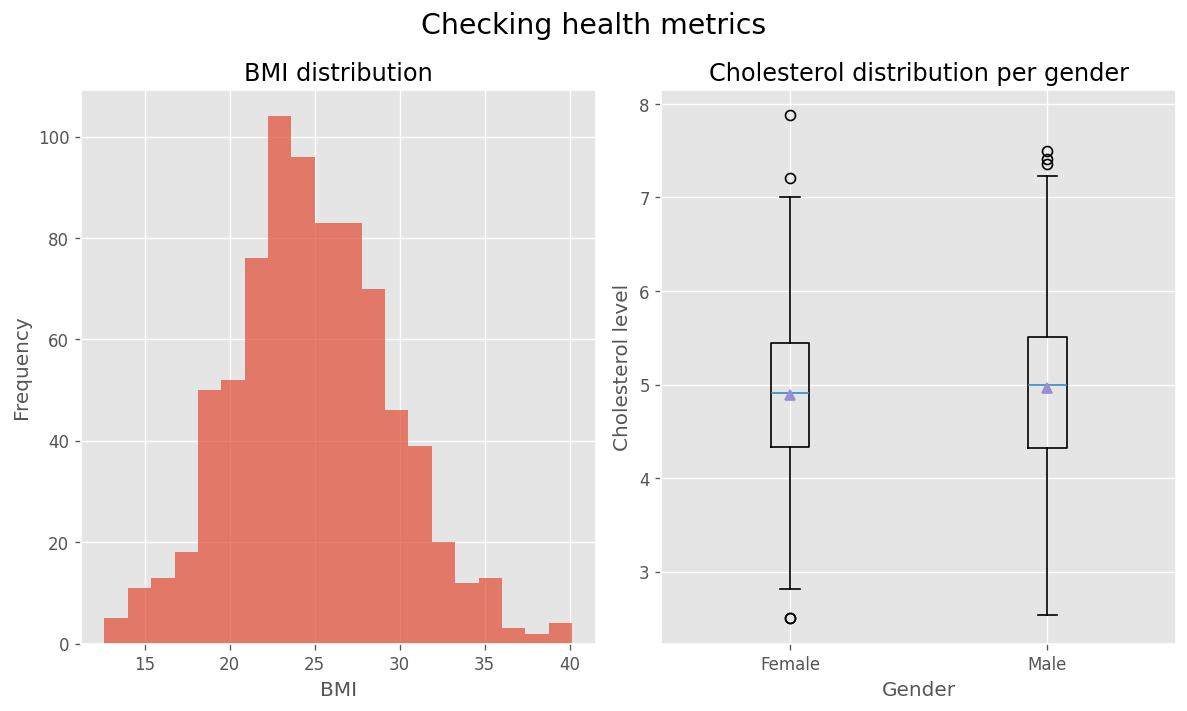

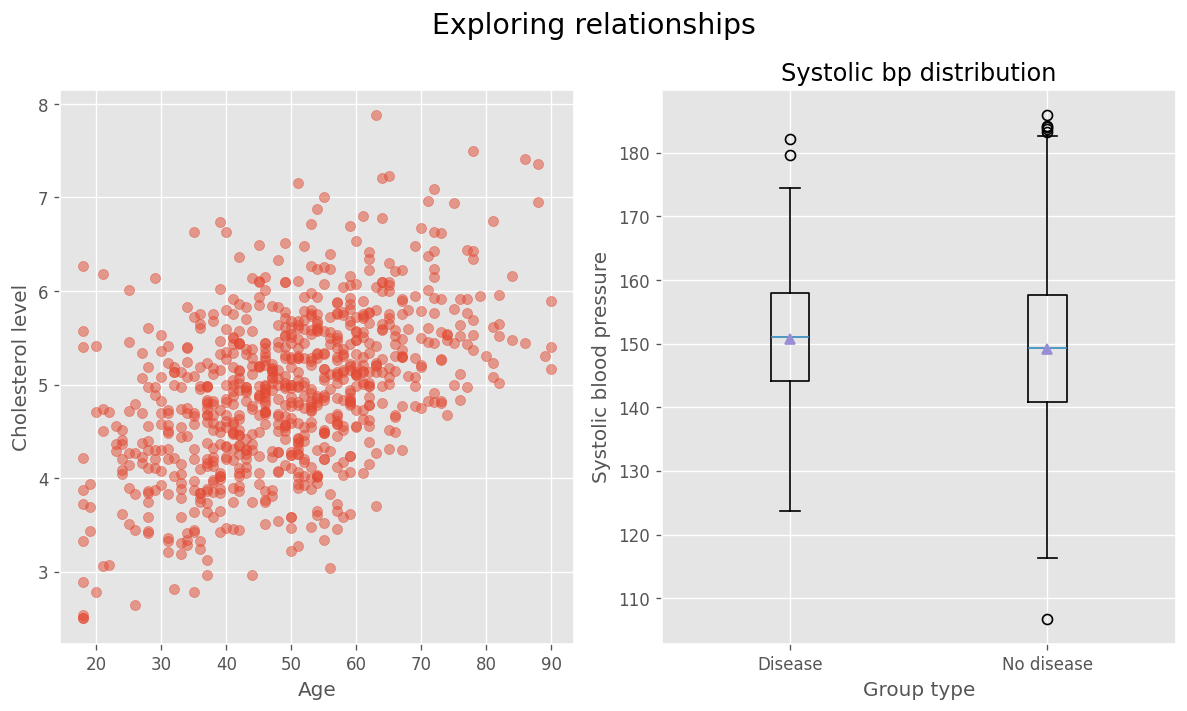

In [51]:
# Histogram: åldersfördelning efter kön
fig1, (ax1, ax2) = plt.subplots(1, 2)
fig1.suptitle("Understanding sample population", fontsize=17)

for s, subset in df.groupby("sex"):
    ax1.hist(subset["age"], bins=30, label=f"{s}", alpha=0.4)
ax1.set_title("Age distribution per gender")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
ax1.legend()

# Stapeldiagram: andel rökare
smoker_per = df["smoker"].value_counts(normalize=True) * 100
ax2.bar(smoker_per.index, smoker_per.values, width=0.7, alpha=0.7)
ax2.set_title("Non-Smokers vs Smokers")
ax2.set_xlabel("Smokers")
ax2.set_ylabel("%")
for i, v in enumerate(smoker_per.values):
    ax2.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()

# Histogram: BMIfördelning
fig2, (ax3, ax4) = plt.subplots(1, 2)
fig2.suptitle("Checking health metrics", fontsize=17)

df["bmi"] = df["weight"] / (df["height"] / 100)**2
ax3.hist(df["bmi"], bins=20, alpha=0.7)
ax3.set_title("BMI distribution")
ax3.set_xlabel("BMI")
ax3.set_ylabel("Frequency")

# Boxplot: cholesterol efter gender
ax4.boxplot([df.loc[df.sex == "F", "cholesterol"], 
           df.loc[df.sex == "M", "cholesterol"]], 
           tick_labels=["Female", "Male"], 
           showmeans=True)
ax4.set_title("Cholesterol distribution per gender")
ax4.set_xlabel("Gender")
ax4.set_ylabel("Cholesterol level")
plt.tight_layout()
plt.show()

# Scatter: age vs cholesterol
fig3, (ax5, ax6) = plt.subplots(1, 2)
fig3.suptitle("Exploring relationships", fontsize=17)

ax5.scatter(df["age"], df["cholesterol"], alpha=0.5)
ax5.set_xlabel("Age")
ax5.set_ylabel("Cholesterol level")

# Boxplot: systoliskt blodtryck efter grupp med/utan sjukdom
ax6.boxplot([df.loc[df.disease == 1, "systolic_bp"], 
           df.loc[df.disease == 0, "systolic_bp"]], 
           tick_labels=["Disease", "No disease"], 
           showmeans=True)
ax6.set_title("Systolic bp distribution")
ax6.set_xlabel("Group type")
ax6.set_ylabel("Systolic blood pressure")
plt.tight_layout()
plt.show()

**Simulering kopplad till caset** (använd numpy.random + seed)

- Beräkna andelen personer i datasetet som har sjukdomen.
- Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
- Jämför den simulerade andelen med den verkliga andelen i datasetet.

**Konfidensintervall**

- Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).


**Hypotesprövning**

- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.

### **För VG ska du även göra:**

- Beräkna konfidensintervallet med **två olika metoder** (t.ex. normalapproximation och bootstrap) och jämför resultaten.
- Gör en simulering för att undersöka **hur säkert ditt hypotes­test är** (t.ex. hur ofta testet hittar en skillnad när den finns → power).
- Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.